<Axes: title={'center': '한글폰트설정'}>

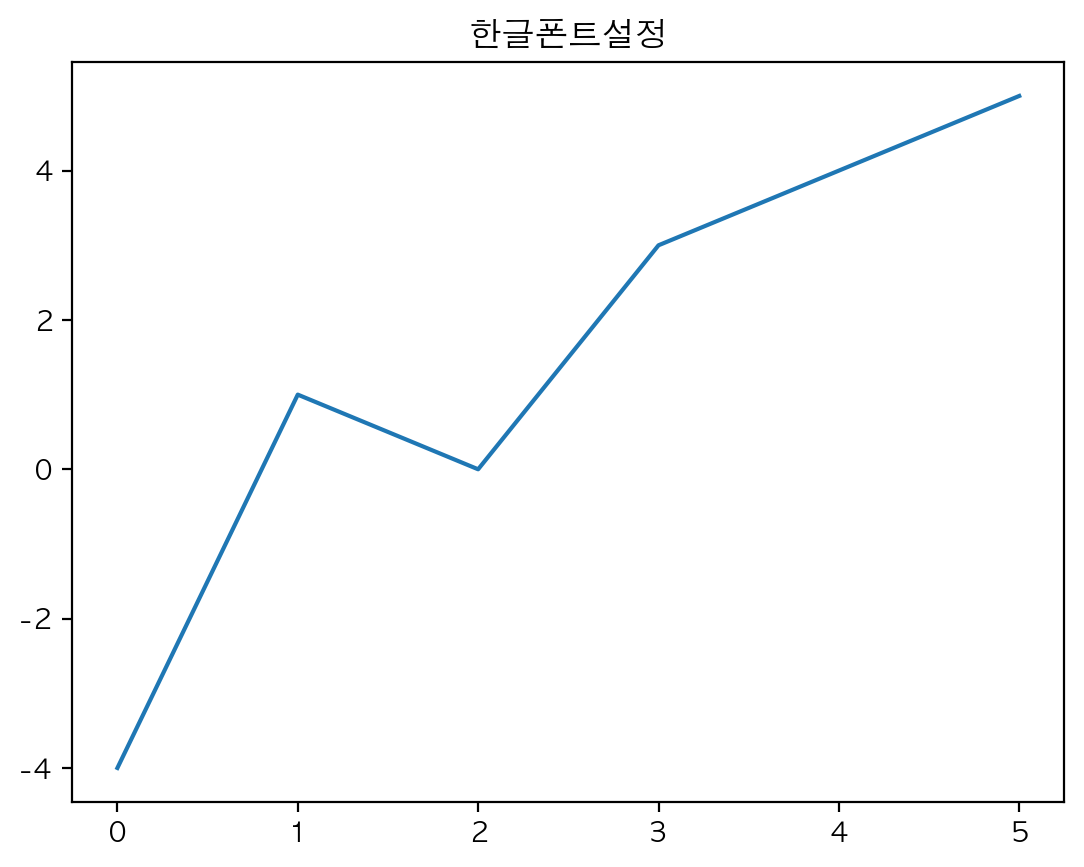

In [1]:
# 레티나 디스플레이로 폰트가 선명하게 표시되도록 합니다.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

# 라이브러리를 로드합니다.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트를 설정합니다.
plt.rc('font',family='AppleGothic')
plt.rc('axes',unicode_minus=False)

pd.Series([-4,1,0,3,4,5]).plot(title='한글폰트설정')

<Axes: xlabel='강의 제목', ylabel='강의 제목'>

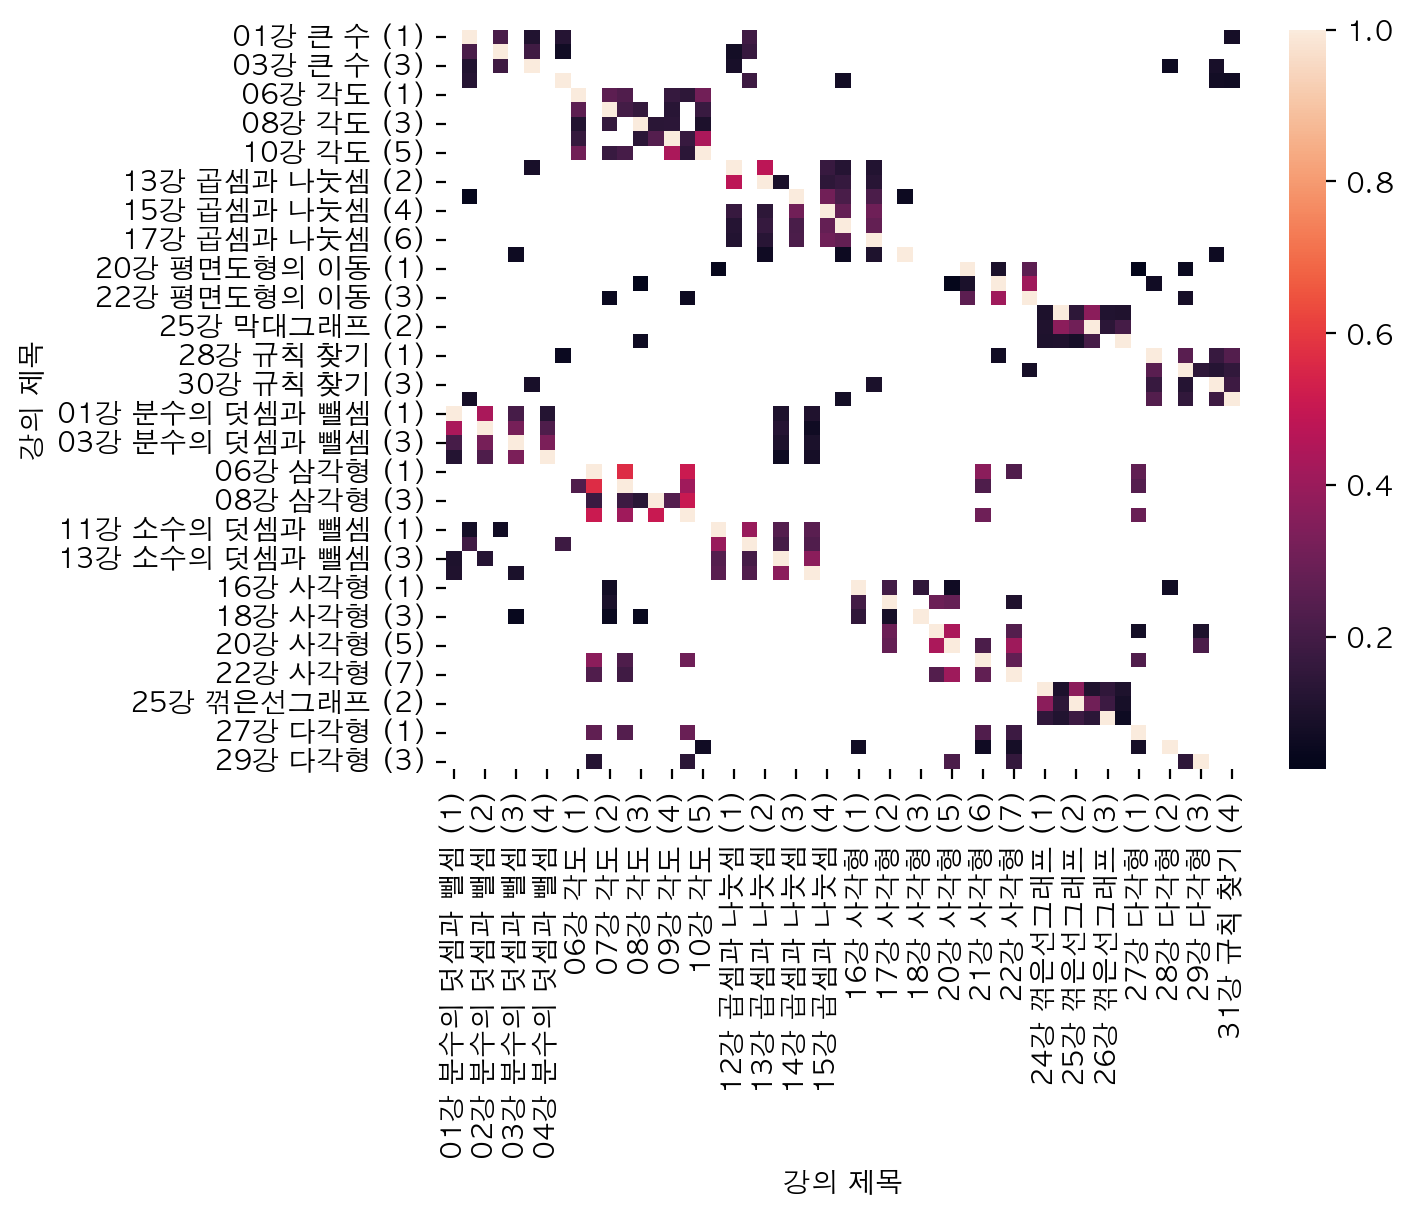

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import seaborn as sns

data = pd.read_csv('../data/final_data.csv')

# 강의 데이터를 결합 (강의 제목 + 강의 내용 + 요약)
data['combined_text'] = data['강의 제목'] + ' ' + data['강의 내용'] + ' ' + data['요약'].apply(lambda x: ' '.join(eval(x)))

# TF-IDF 벡터라이저 생성 및 학습
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['combined_text'])

# 코사인 유사도를 사용하여 각 강의 간의 유사도 계산
cosine_similarities = cosine_similarity(tfidf_matrix)

# 유사도 행렬을 데이터프레임으로 변환하여 보기 쉽게 출력
similarity_df = pd.DataFrame(cosine_similarities, index=data['강의 제목'], columns=data['강의 제목'])

# 상위 5개의 유사도가 높은 강의 찾기 예시
top_similarities = similarity_df.apply(lambda row: row.sort_values(ascending=False).head(6), axis=1)

# 유사한 강의 묶음을 출력
top_similarities

sns.heatmap(top_similarities)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# 강의 제목, 내용, 요약을 하나의 텍스트로 결합
data['combined_text'] = data['강의 제목'] + ' ' + data['강의 내용'] + ' ' + data['요약'].apply(lambda x: ' '.join(eval(x)))

# TF-IDF 벡터라이저 생성 및 학습
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['combined_text'])

# 코사인 유사도를 사용하여 각 강의 간의 유사도 계산
cosine_similarities = cosine_similarity(tfidf_matrix)

num_clusters = 13
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(tfidf_matrix)

# 각 단원에 속하는 강의 확인
for cluster_num in range(num_clusters):
    print(f"\n단원 {cluster_num + 1}:")
    print(data[data['cluster'] == cluster_num][['강의 제목', '강의 내용']])



단원 1:
            강의 제목                                              강의 내용
19  24강 막대그래프 (1)  이번 시간에는 막대그래프라는 새로운 개념을 배워 봅시다. 막대그래프는 신문이나 뉴스...
20  25강 막대그래프 (2)  지난 시간에 막대그래프에 대해 배웠습니다. 이번 시간에는 직접 막대그래프로 나타내는...
21  26강 막대그래프 (3)  지난 시간에 배운 막대그래프를 활용하여 이야기를 시각적으로 표현하는 방법을 배웁니다...

단원 2:
          강의 제목                                              강의 내용
30  06강 삼각형 (1)  삼각형은 3개의 선분으로 둘러싸인 도형입니다. 삼각형을 분류할 때는 변의 길이를 기...
31  07강 삼각형 (2)  이번 시간에는 이등변 삼각형과 정삼각형의 성질에 대해 배웁니다. 이등변 삼각형은 두...
33  09강 삼각형 (4)  삼각형을 변의 길이와 각의 크기에 따라 분류하는 방법을 배웁니다. 변의 길이에 따라...
42  20강 사각형 (5)  지난 시간에 사다리꼴에 대해 배웠습니다. 이번 시간에는 마주보는 두 쌍의 변이 서로...
43  21강 사각형 (6)  사각형을 변의 길이에 따라 분류합니다. 먼저, 변의 길이가 모두 같은 사각형을 마름...
44  22강 사각형 (7)  이번 시간에는 여러 가지 사각형의 성질을 정리합니다. 먼저 직사각형의 성질을 알아봅...
48  27강 다각형 (1)  다각형은 선분으로만 둘러싸인 도형을 의미합니다. 다각형의 중요한 두 가지 개념은 선...
50  29강 다각형 (3)  이번 시간에는 다각형을 이용한 모양 만들기와 모양 채우기를 배웁니다. 먼저 여러 가...

단원 3:
          강의 제목                                              강의 내용
4    06강 각도 (1)  이번 시간에는 각도에 대해 배

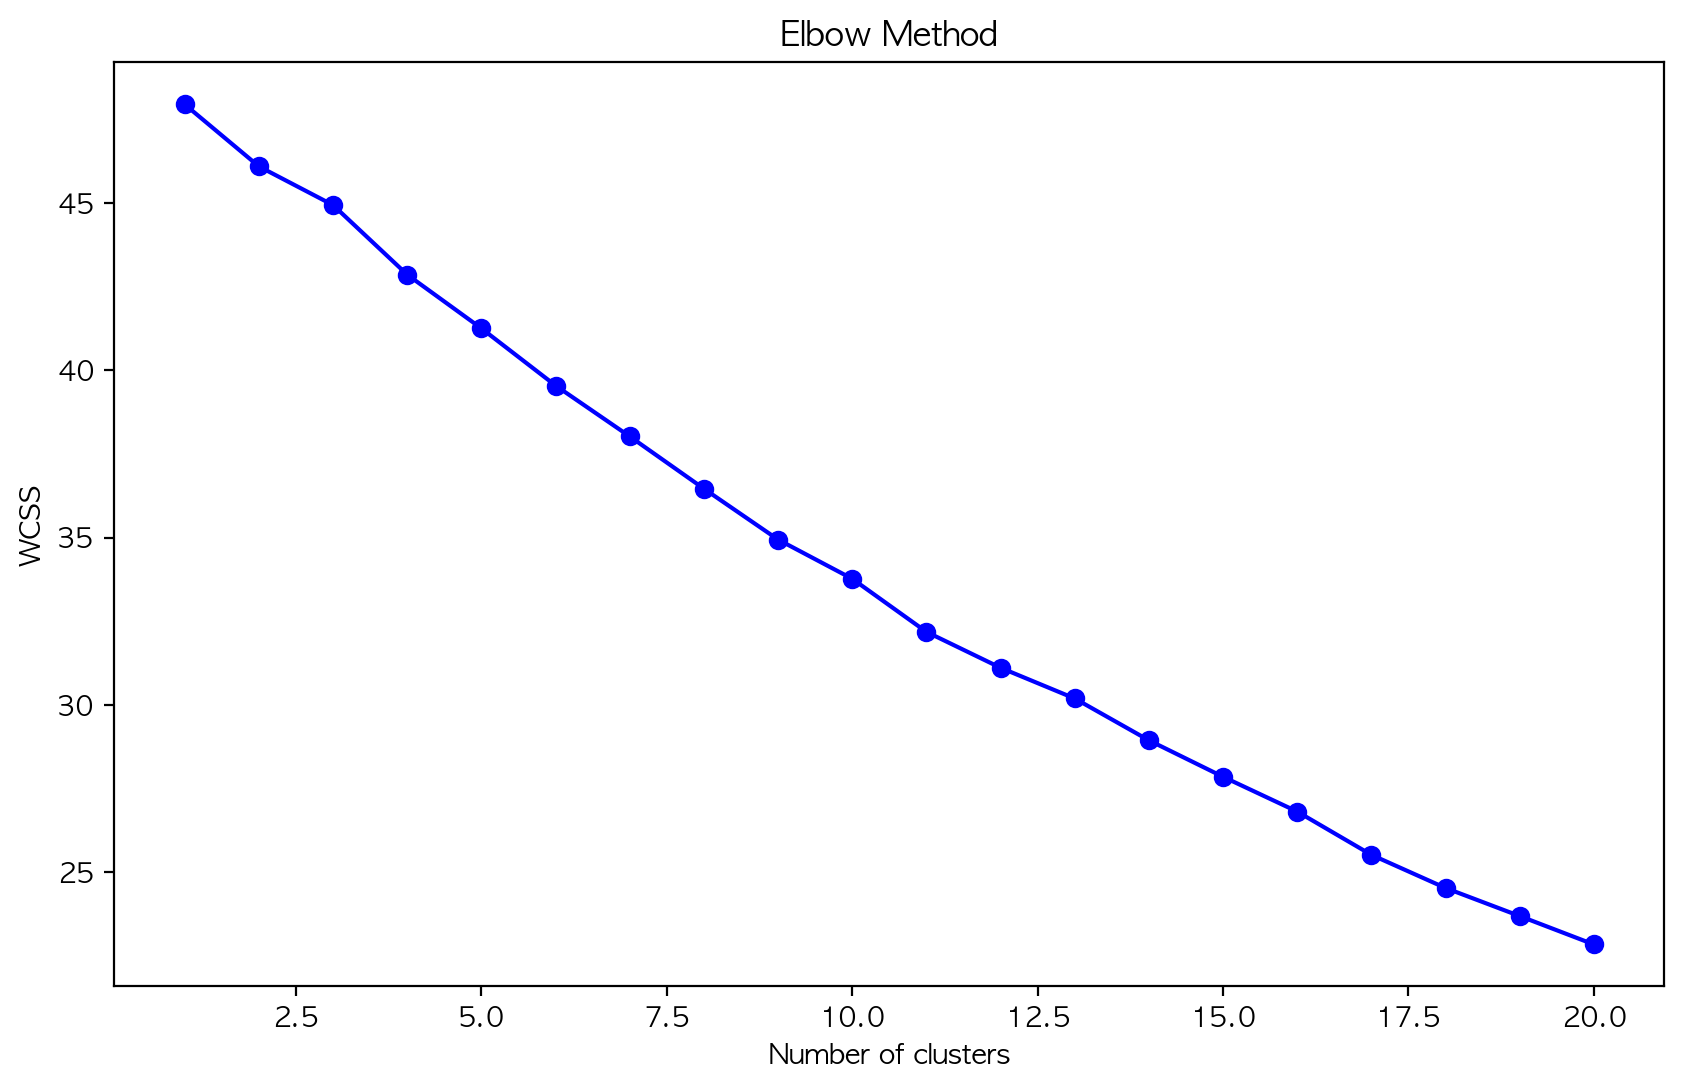

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['combined_text'])

# Elbow Method: 클러스터 수에 따른 WCSS 계산
wcss = []
for i in range(1, 21):  # 클러스터 개수를 1~20까지 변화시키면서 WCSS 확인
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)  # WCSS 값 저장

# 엘보우 방법을 시각화하여 최적의 클러스터 수를 확인
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


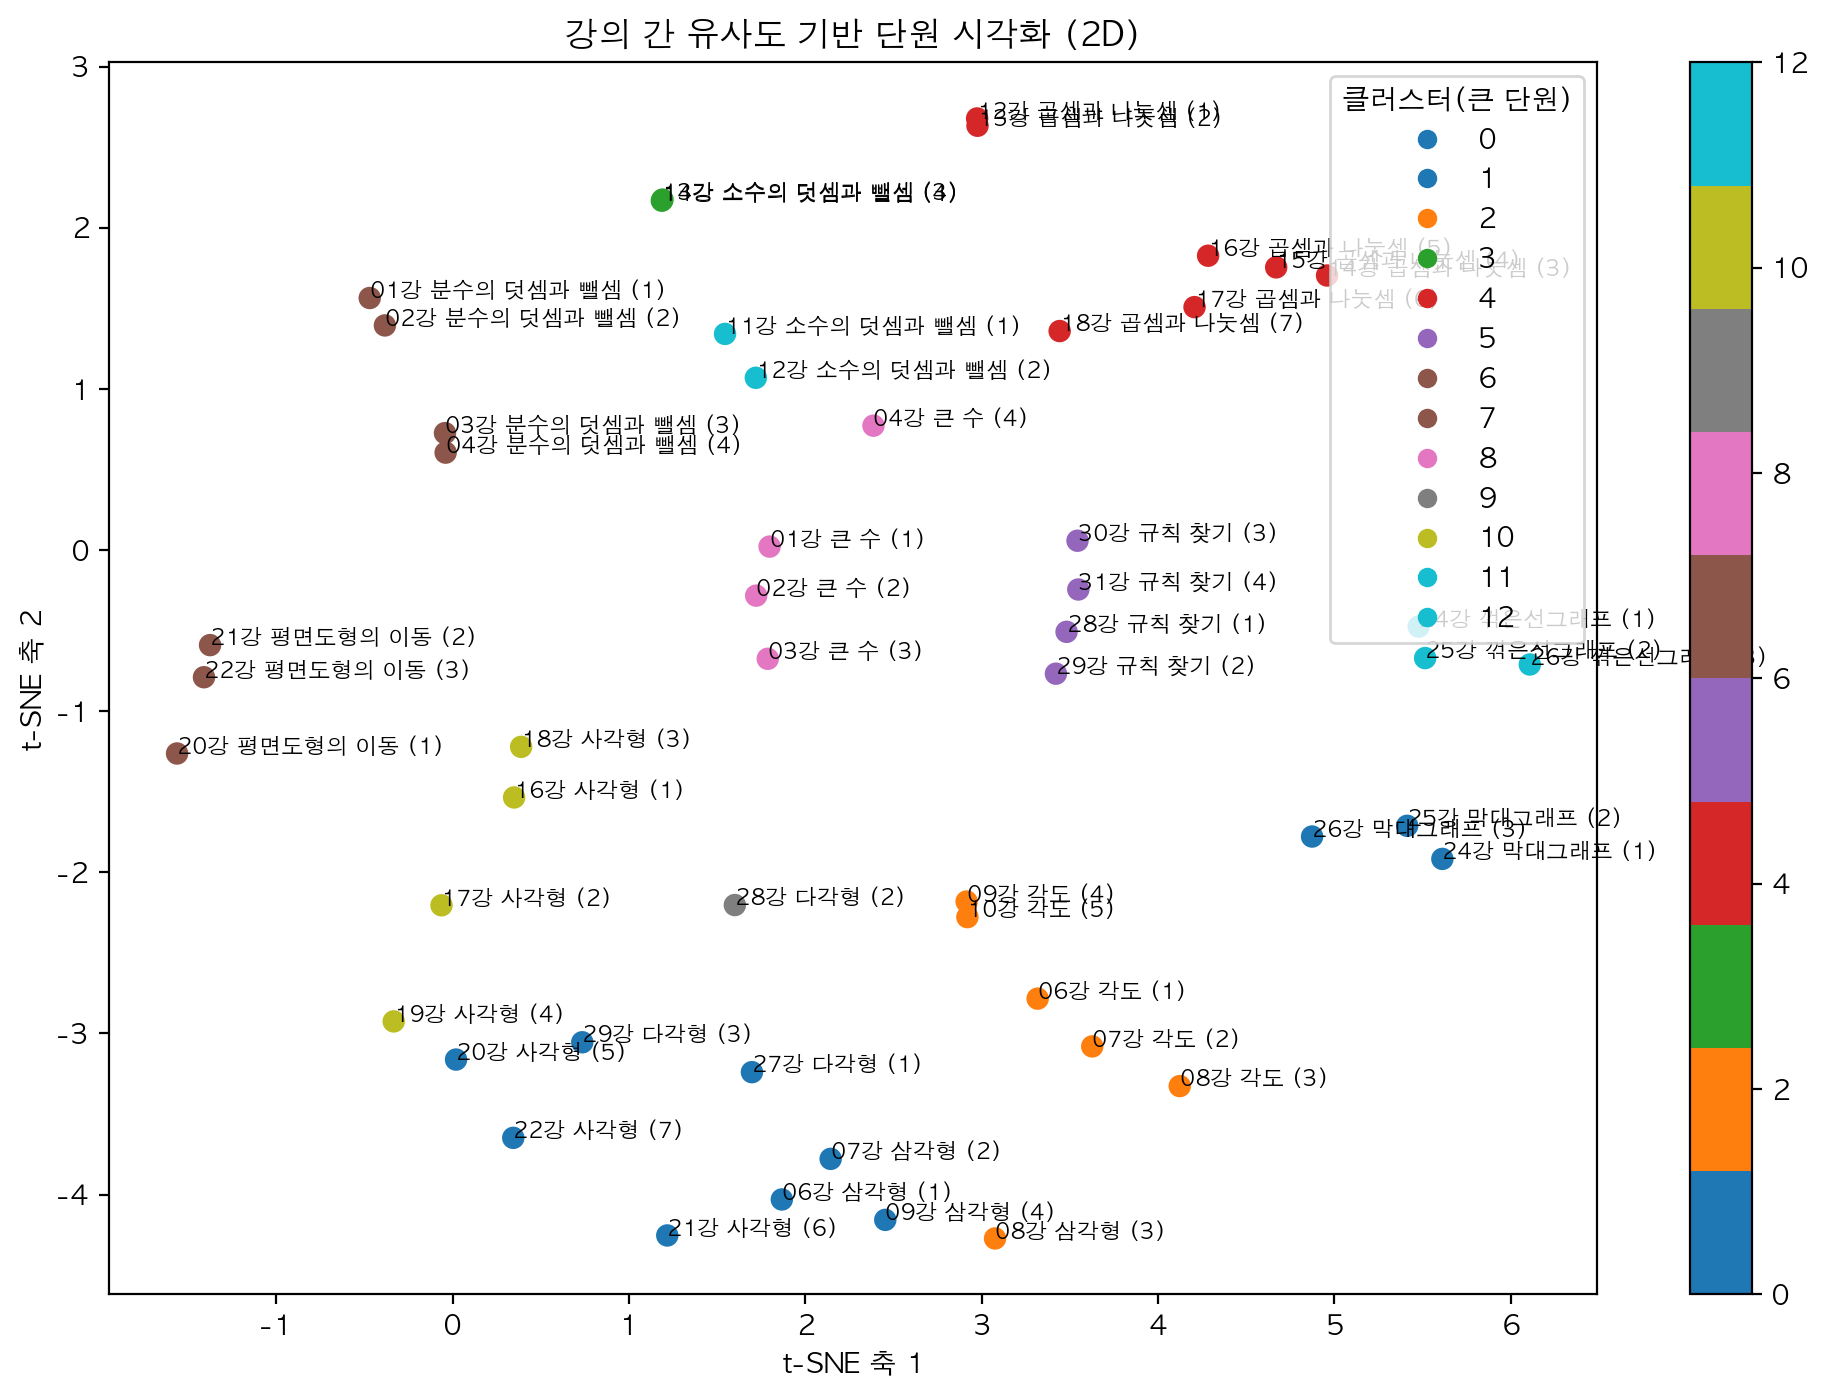

In [5]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# t-SNE로 차원 축소 (2차원)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

# 결과를 DataFrame에 저장
data['tsne_2d_one'] = tsne_results[:, 0]
data['tsne_2d_two'] = tsne_results[:, 1]

# 시각화
plt.figure(figsize=(12, 8))

# 각 클러스터에 다른 색으로 시각화
scatter = plt.scatter(data['tsne_2d_one'], data['tsne_2d_two'], c=data['cluster'], cmap='tab10', s=50)

# 클러스터 레이블을 범례로 표시
plt.legend(*scatter.legend_elements(), title="클러스터(큰 단원)")

plt.title("강의 간 유사도 기반 단원 시각화 (2D)")
plt.xlabel("t-SNE 축 1")
plt.ylabel("t-SNE 축 2")

# 각 점에 강의 제목을 표시
for i, title in enumerate(data['강의 제목']):
    plt.text(data['tsne_2d_one'][i], data['tsne_2d_two'][i], title, fontsize=8)

plt.colorbar()
plt.show()


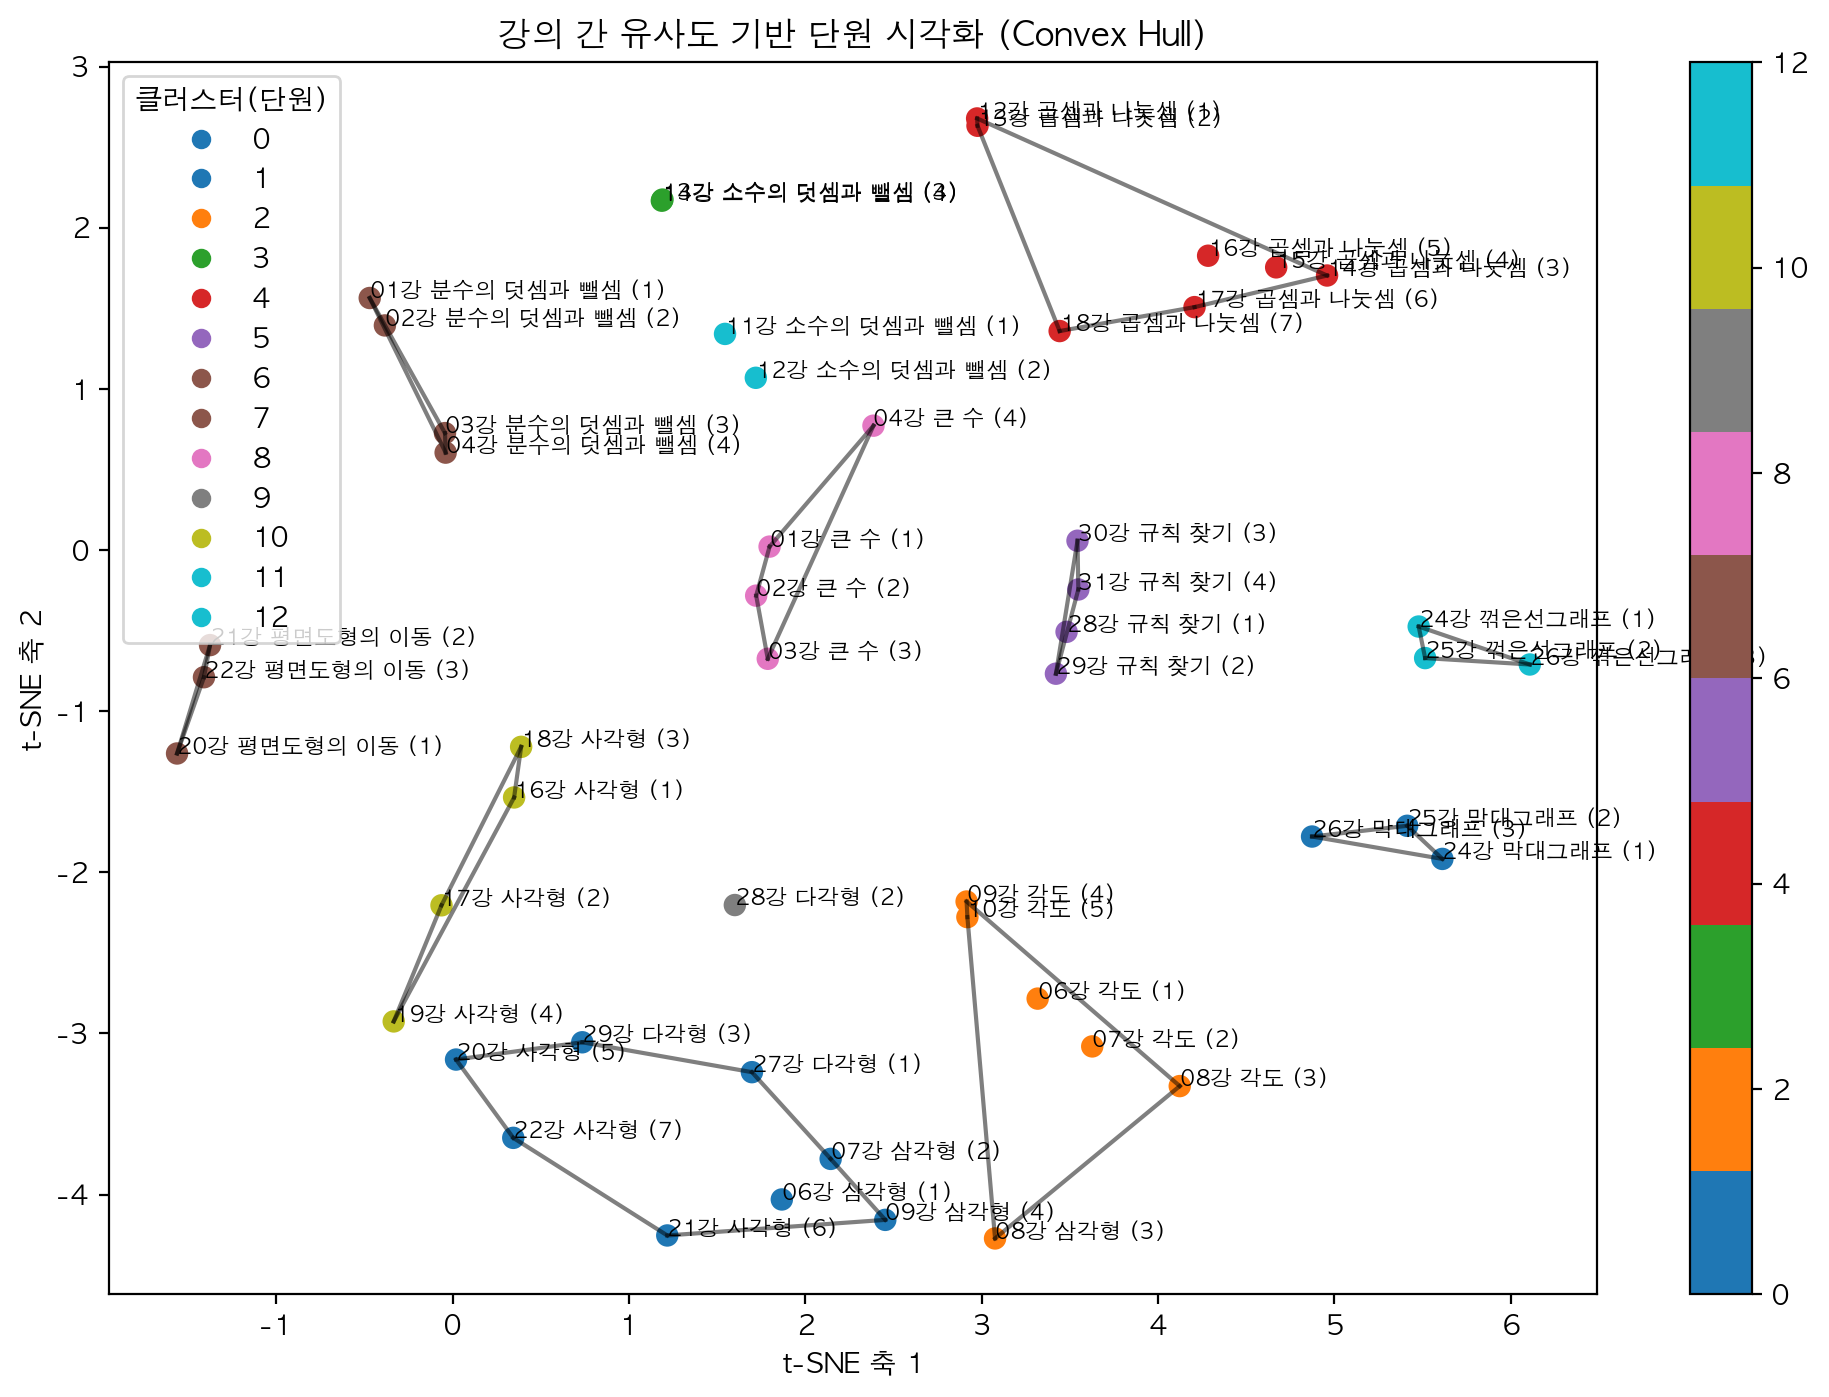

In [6]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.spatial import ConvexHull
import numpy as np

# t-SNE로 차원 축소 (2차원)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

# 결과를 DataFrame에 저장
data['tsne_2d_one'] = tsne_results[:, 0]
data['tsne_2d_two'] = tsne_results[:, 1]

# 시각화
plt.figure(figsize=(12, 8))

# 각 클러스터에 다른 색으로 시각화
scatter = plt.scatter(data['tsne_2d_one'], data['tsne_2d_two'], c=data['cluster'], cmap='tab10', s=50)

# 각 클러스터에 대한 Convex Hull 경계 그리기
for cluster in np.unique(data['cluster']):
    cluster_data = data[data['cluster'] == cluster]
    points = np.vstack((cluster_data['tsne_2d_one'], cluster_data['tsne_2d_two'])).T
    if len(points) > 2:  # ConvexHull은 3개 이상의 점이 필요
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], 'k-', alpha=0.5)

# 클러스터 레이블을 범례로 표시
plt.legend(*scatter.legend_elements(), title="클러스터(단원)")

plt.title("강의 간 유사도 기반 단원 시각화 (Convex Hull)")
plt.xlabel("t-SNE 축 1")
plt.ylabel("t-SNE 축 2")

# 각 점에 강의 제목을 표시
for i, title in enumerate(data['강의 제목']):
    plt.text(data['tsne_2d_one'][i], data['tsne_2d_two'][i], title, fontsize=8)

plt.colorbar()
plt.show()


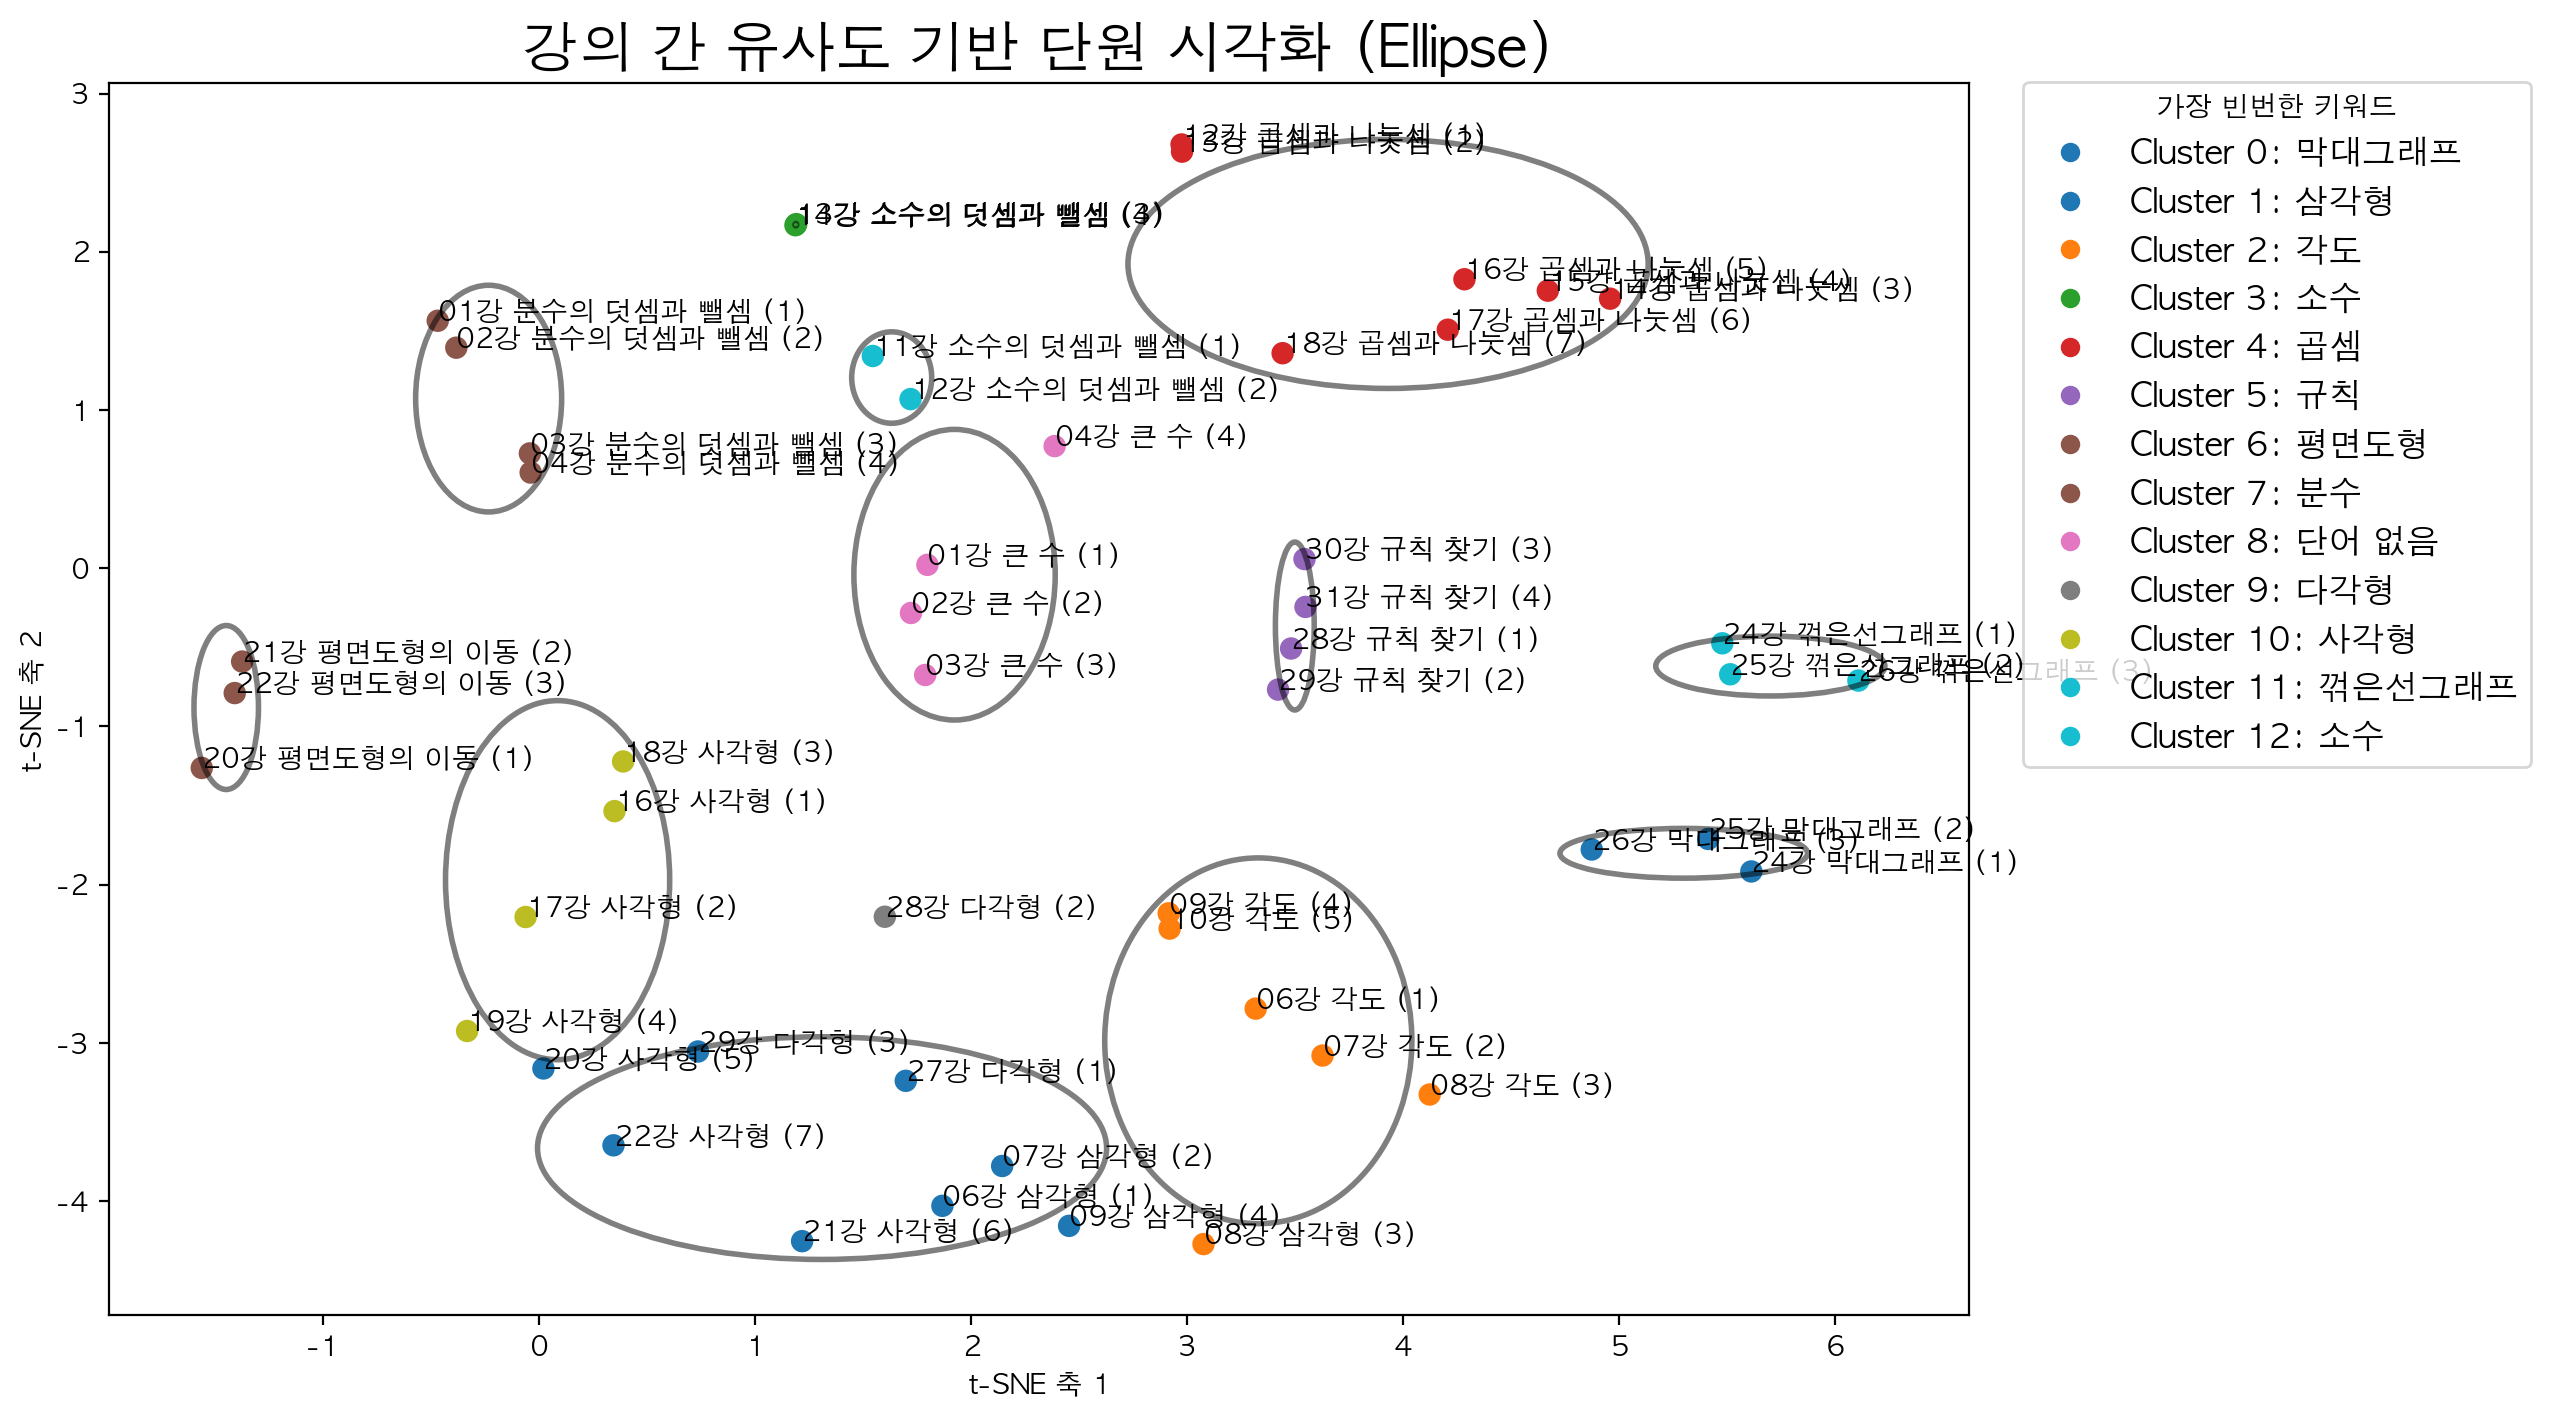

In [23]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from collections import Counter
from konlpy.tag import Okt  # OKT 형태소 분석기 사용
import re

# OKT 형태소 분석기 초기화
okt = Okt()

# 불용어 목록 정의 ("강" 및 기타 불필요한 단어들 제외)
stopwords = ['강', '수', '과', '의', '및', '에서', '를', '에', '을', '와', '로', '도', '한']

# 강의 제목에서 숫자+강 패턴 제거 함수
def remove_chapter_prefix(title):
    # 숫자로 시작하는 'XX강' 패턴을 제거 (예: 01강, 02강 등)
    return re.sub(r'^\d+강\s*', '', title)

# 불용어 목록과 숫자+강 패턴을 필터링하는 함수
def is_invalid_word(word):
    return bool(re.match(r'\d+강', word)) or word in stopwords

# t-SNE로 차원 축소 (2차원)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

# 결과를 DataFrame에 저장
data['tsne_2d_one'] = tsne_results[:, 0]
data['tsne_2d_two'] = tsne_results[:, 1]

# 형태소 분리 후 명사(NNG, NNP) 추출 및 복합 명사 처리 함수
def extract_nouns(text):
    # 강의 제목에서 숫자+강 패턴을 먼저 제거
    cleaned_text = remove_chapter_prefix(text)
    # OKT의 phrases를 사용하여 복합 명사 처리
    nouns_phrases = okt.phrases(cleaned_text)
    # 불용어 목록과 숫자+강 패턴에 있는 단어 제외
    nouns = [noun for noun in nouns_phrases if not is_invalid_word(noun)]
    return nouns

# 시각화
plt.figure(figsize=(12, 8))

# 각 클러스터에 다른 색으로 시각화
scatter = plt.scatter(data['tsne_2d_one'], data['tsne_2d_two'], c=data['cluster'], cmap='tab10', s=50)

# 범례에 사용할 클러스터별 가장 빈번한 명사 찾기
cluster_labels = {}
for cluster in np.unique(data['cluster']):
    cluster_data = data[data['cluster'] == cluster]
    
    # 타원의 중심 계산 (평균값)
    mean_x = cluster_data['tsne_2d_one'].mean()
    mean_y = cluster_data['tsne_2d_two'].mean()
    
    # 타원의 가로축, 세로축 (표준편차)
    width = cluster_data['tsne_2d_one'].std() * 3  # 3배 표준편차로 설정
    height = cluster_data['tsne_2d_two'].std() * 3  # 3배 표준편차로 설정
    
    # 타원 그리기
    ellipse = Ellipse((mean_x, mean_y), width, height, edgecolor='black', facecolor='none', lw=2, alpha=0.5)
    plt.gca().add_patch(ellipse)
    
    # 클러스터 내에서 강의 제목의 명사 추출
    all_nouns = []
    for title in cluster_data['강의 제목']:
        nouns = extract_nouns(title)
        all_nouns.extend(nouns)
    
    # 가장 빈번한 명사 찾기 (불용어 및 숫자+강 패턴 제외)
    if all_nouns:
        most_common_noun = Counter(all_nouns).most_common(1)[0][0]
        cluster_labels[cluster] = most_common_noun
    else:
        cluster_labels[cluster] = "단어 없음"

# 범례에 클러스터별 가장 빈번한 명사 표시
handles, _ = scatter.legend_elements()
legend_labels = [f"Cluster {int(c)}: {cluster_labels[c]}" for c in np.unique(data['cluster'])]
plt.legend(handles, legend_labels, title="가장 빈번한 키워드", bbox_to_anchor=(1.02, 1.015), loc='upper left',fontsize=12)

plt.title("강의 간 유사도 기반 단원 시각화 (Ellipse)",fontsize=20)
plt.xlabel("t-SNE 축 1")
plt.ylabel("t-SNE 축 2")

# 각 점에 강의 제목을 표시
for i, title in enumerate(data['강의 제목']):
    plt.text(data['tsne_2d_one'][i], data['tsne_2d_two'][i], title, fontsize=10)

plt.show()


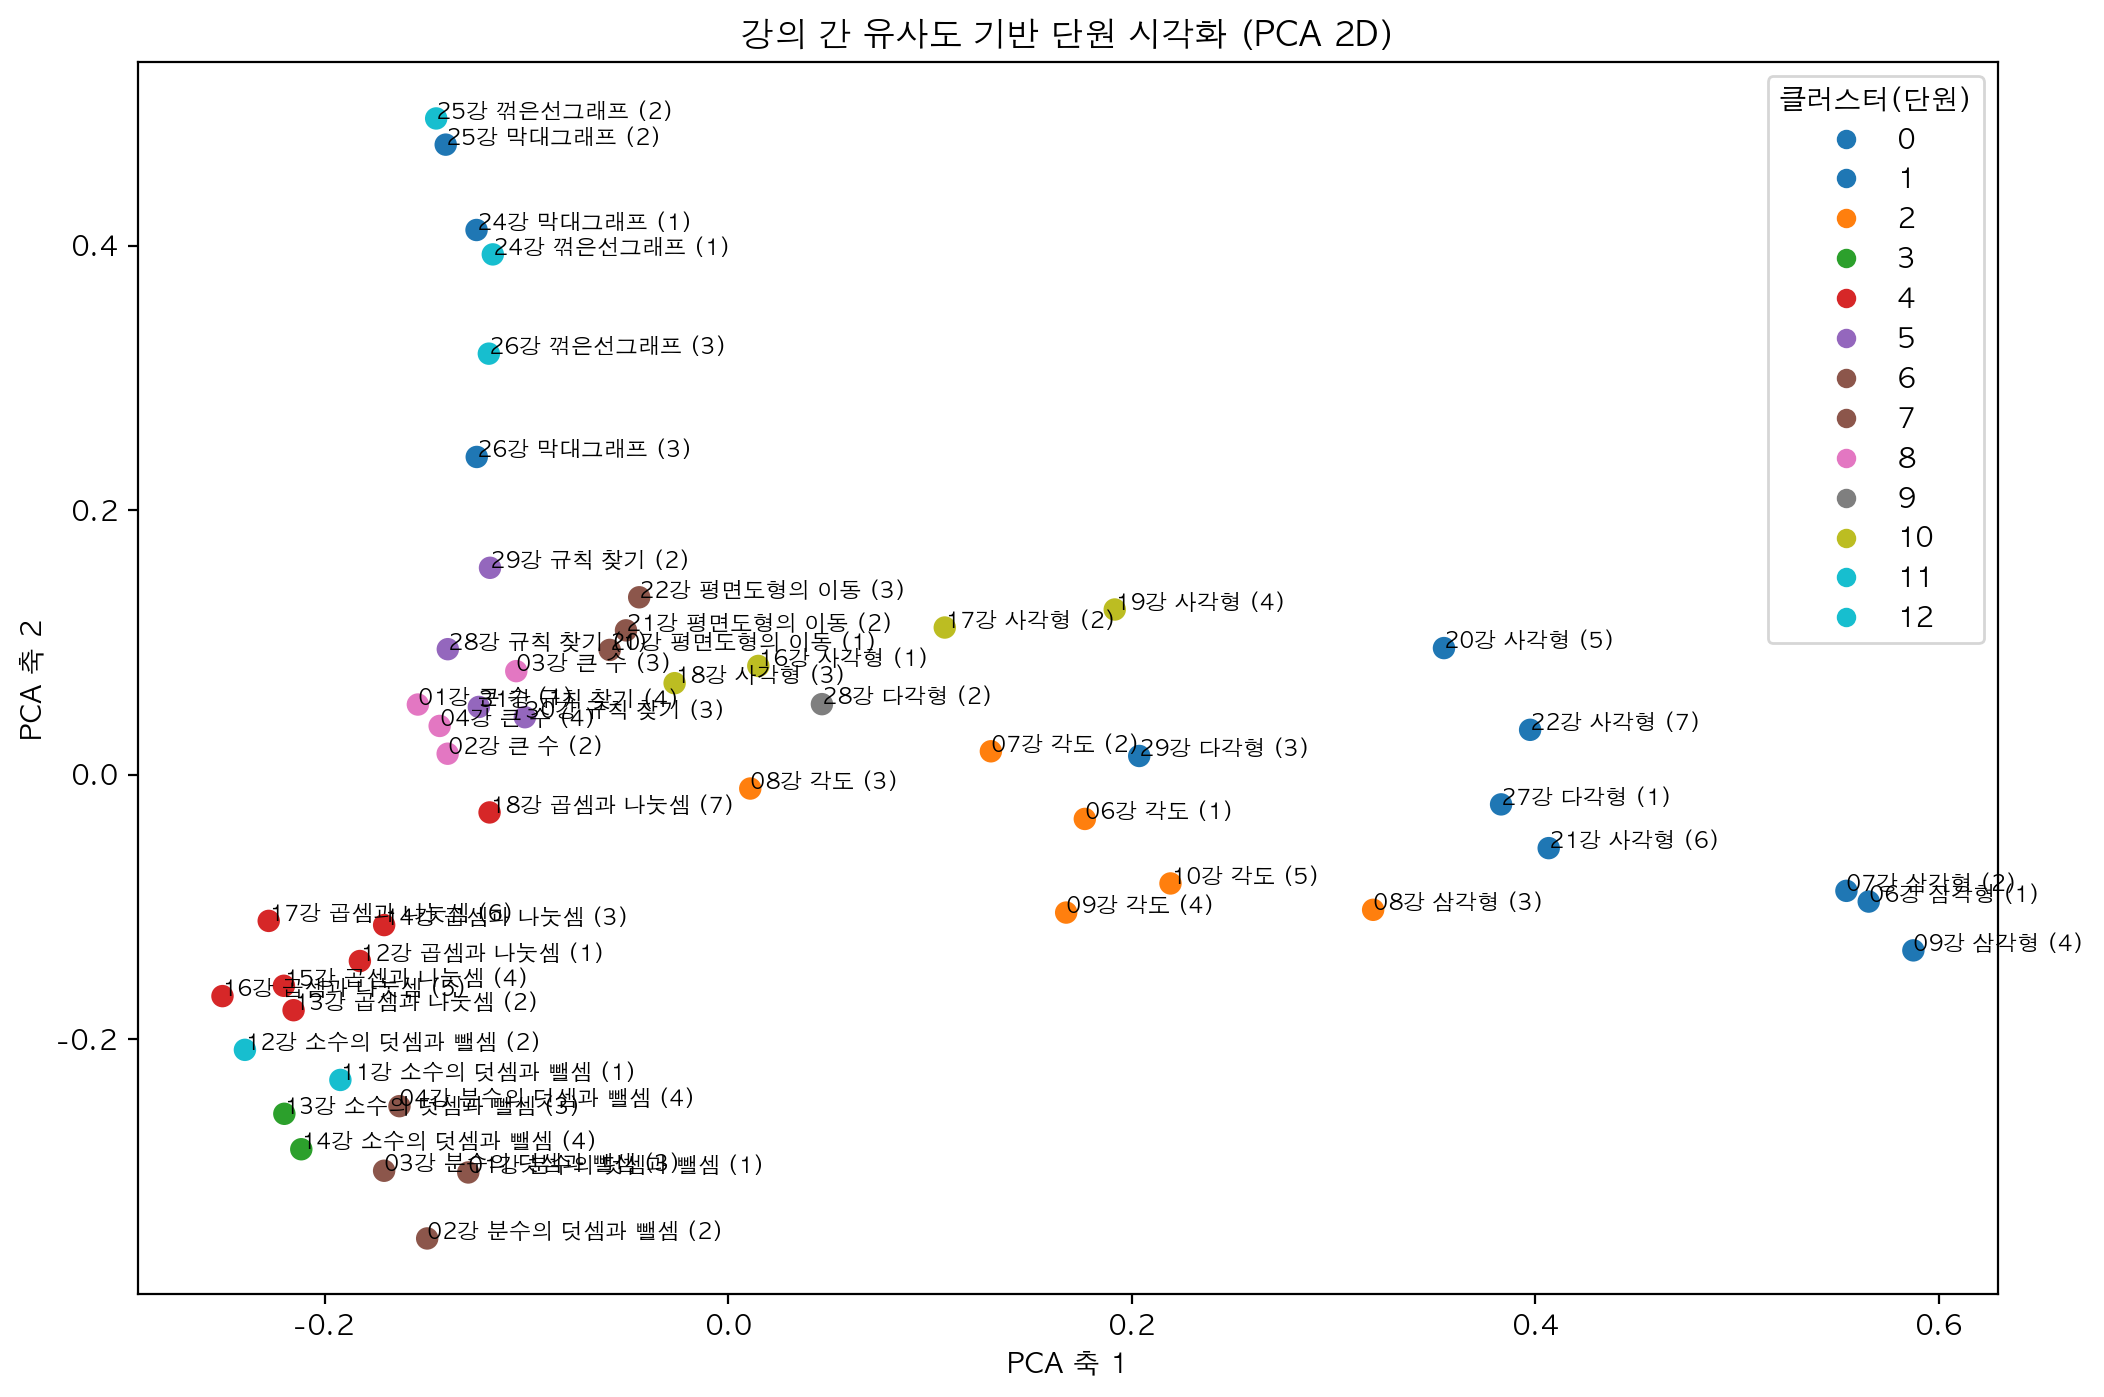

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA로 차원 축소 (2차원)
pca = PCA(n_components=2)
pca_results = pca.fit_transform(tfidf_matrix.toarray())

# 결과를 DataFrame에 저장
data['pca_2d_one'] = pca_results[:, 0]
data['pca_2d_two'] = pca_results[:, 1]

# 시각화
plt.figure(figsize=(12, 8))

# 각 클러스터에 다른 색으로 시각화
scatter = plt.scatter(data['pca_2d_one'], data['pca_2d_two'], c=data['cluster'], cmap='tab10', s=50)

# 클러스터 레이블을 범례로 표시
plt.legend(*scatter.legend_elements(), title="클러스터(단원)")

plt.title("강의 간 유사도 기반 단원 시각화 (PCA 2D)")
plt.xlabel("PCA 축 1")
plt.ylabel("PCA 축 2")

# 각 점에 강의 제목을 표시
for i, title in enumerate(data['강의 제목']):
    plt.text(data['pca_2d_one'][i], data['pca_2d_two'][i], title, fontsize=8)

# plt.colorbar()
plt.show()


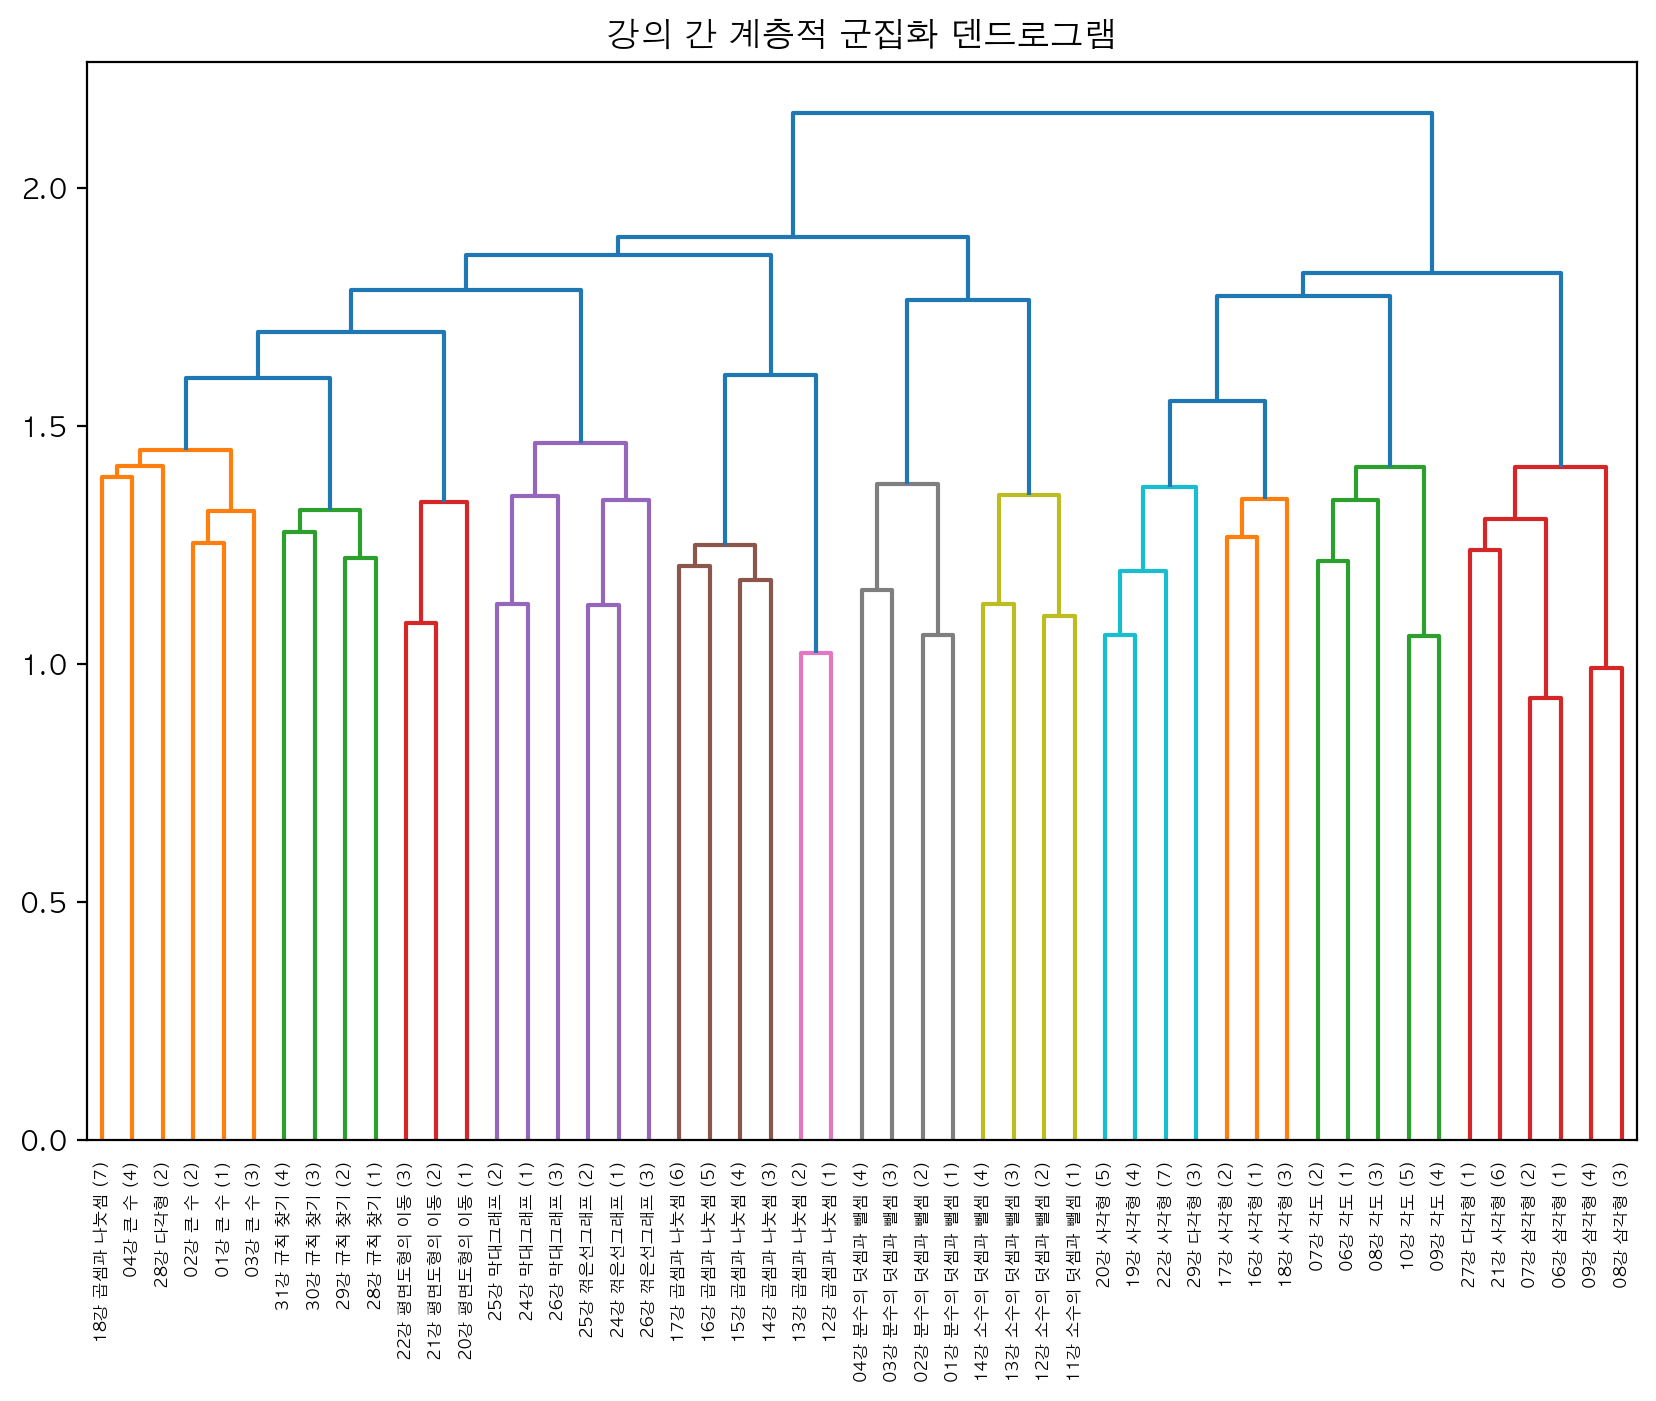

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 계층적 군집화를 위한 링크 생성
linked = linkage(tfidf_matrix.toarray(), method='ward')

# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=data['강의 제목'].to_list(),
            distance_sort='descending',
            show_leaf_counts=True)
plt.title("강의 간 계층적 군집화 덴드로그램")
plt.show()


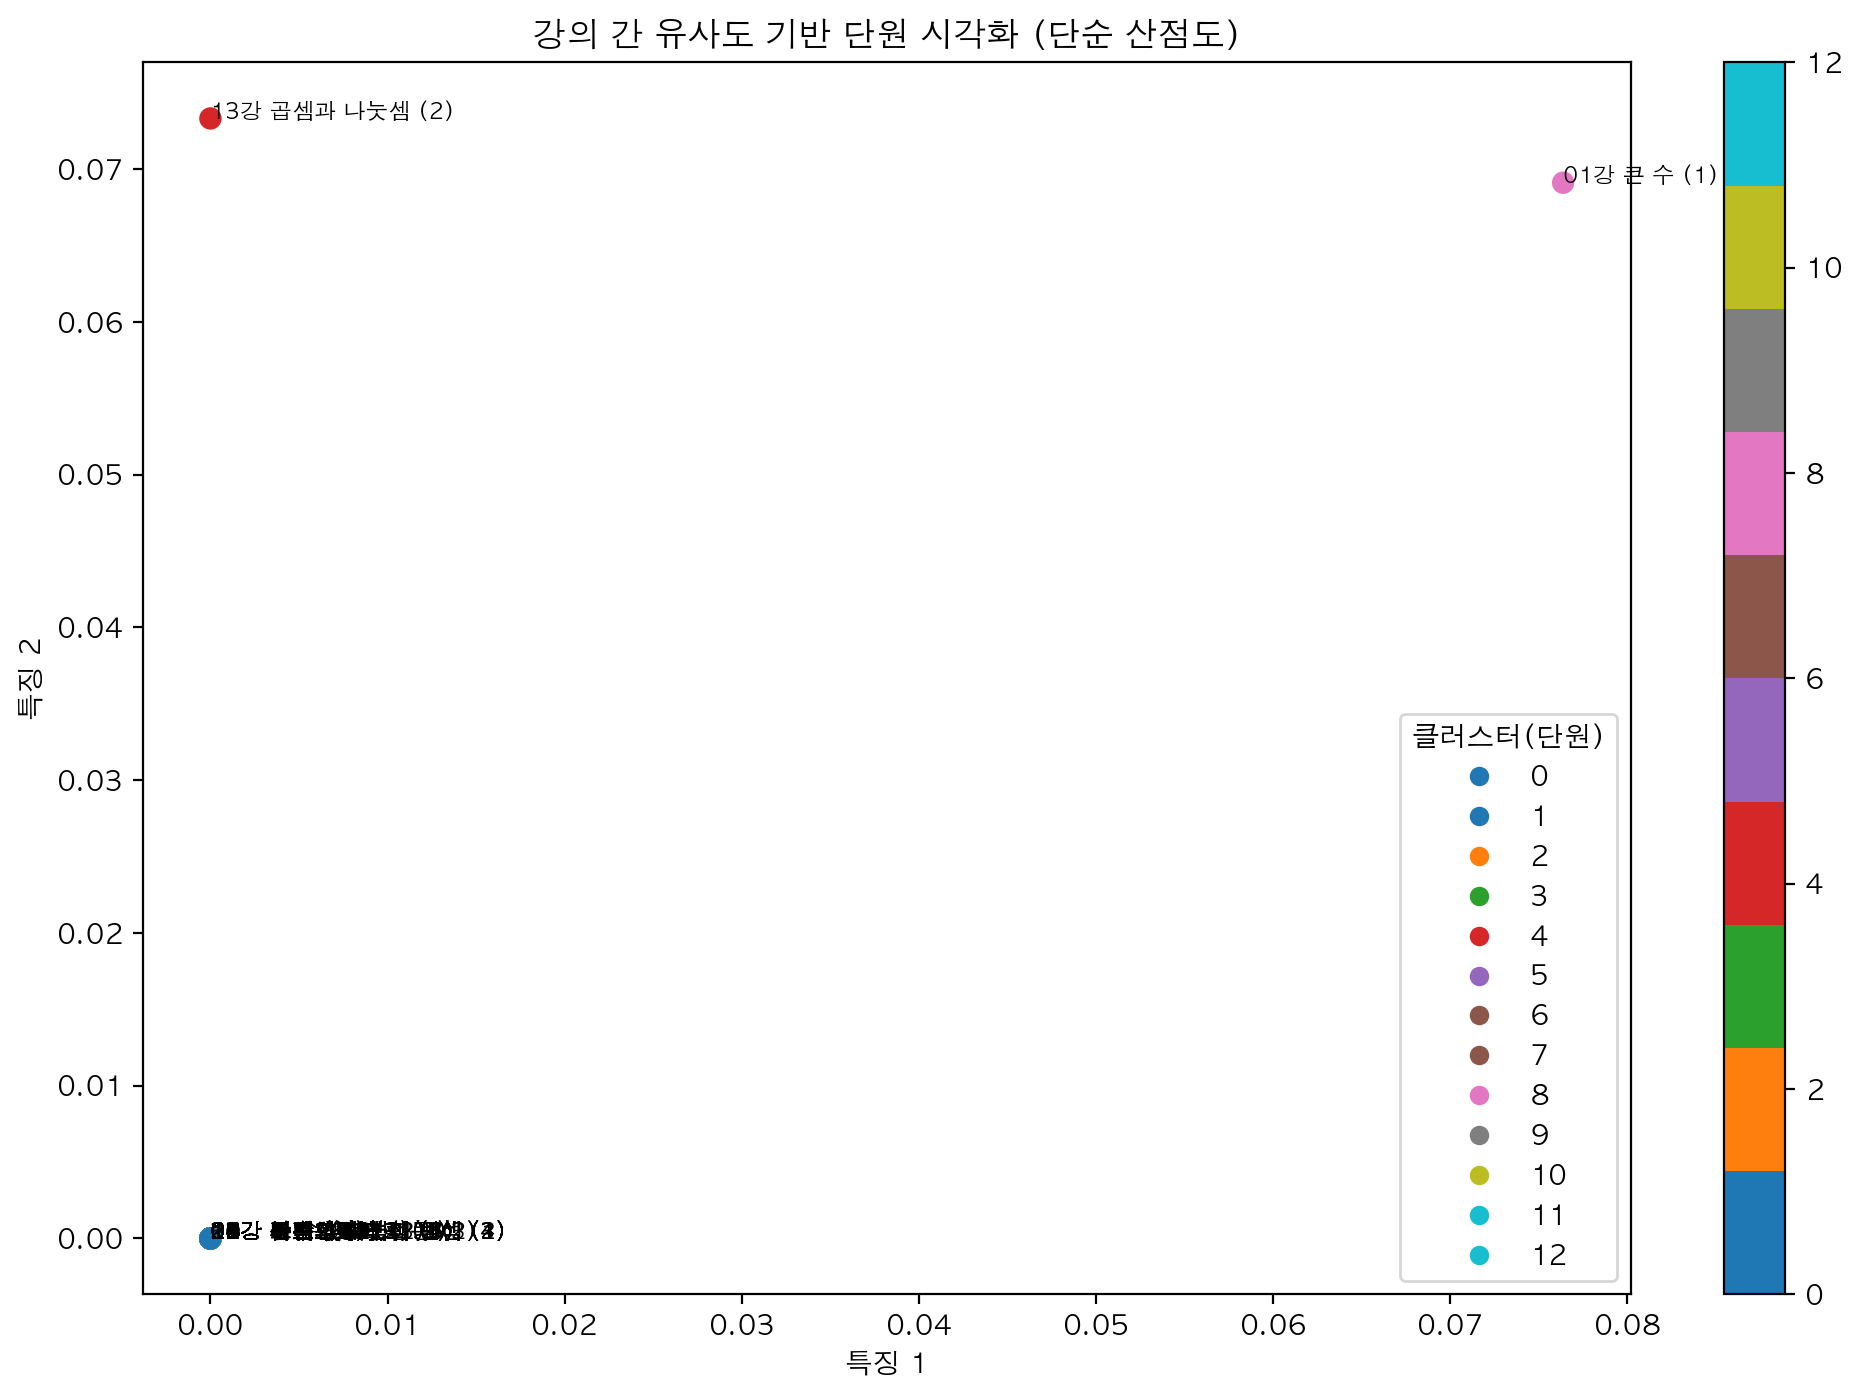

In [10]:
plt.figure(figsize=(12, 8))

# 각 클러스터에 다른 색으로 시각화
scatter = plt.scatter(tfidf_matrix.toarray()[:, 0], tfidf_matrix.toarray()[:, 1], c=data['cluster'], cmap='tab10', s=50)

# 클러스터 레이블을 범례로 표시
plt.legend(*scatter.legend_elements(), title="클러스터(단원)")

plt.title("강의 간 유사도 기반 단원 시각화 (단순 산점도)")
plt.xlabel("특징 1")
plt.ylabel("특징 2")

# 각 점에 강의 제목을 표시
for i, title in enumerate(data['강의 제목']):
    plt.text(tfidf_matrix.toarray()[i, 0], tfidf_matrix.toarray()[i, 1], title, fontsize=8)

plt.colorbar()
plt.show()


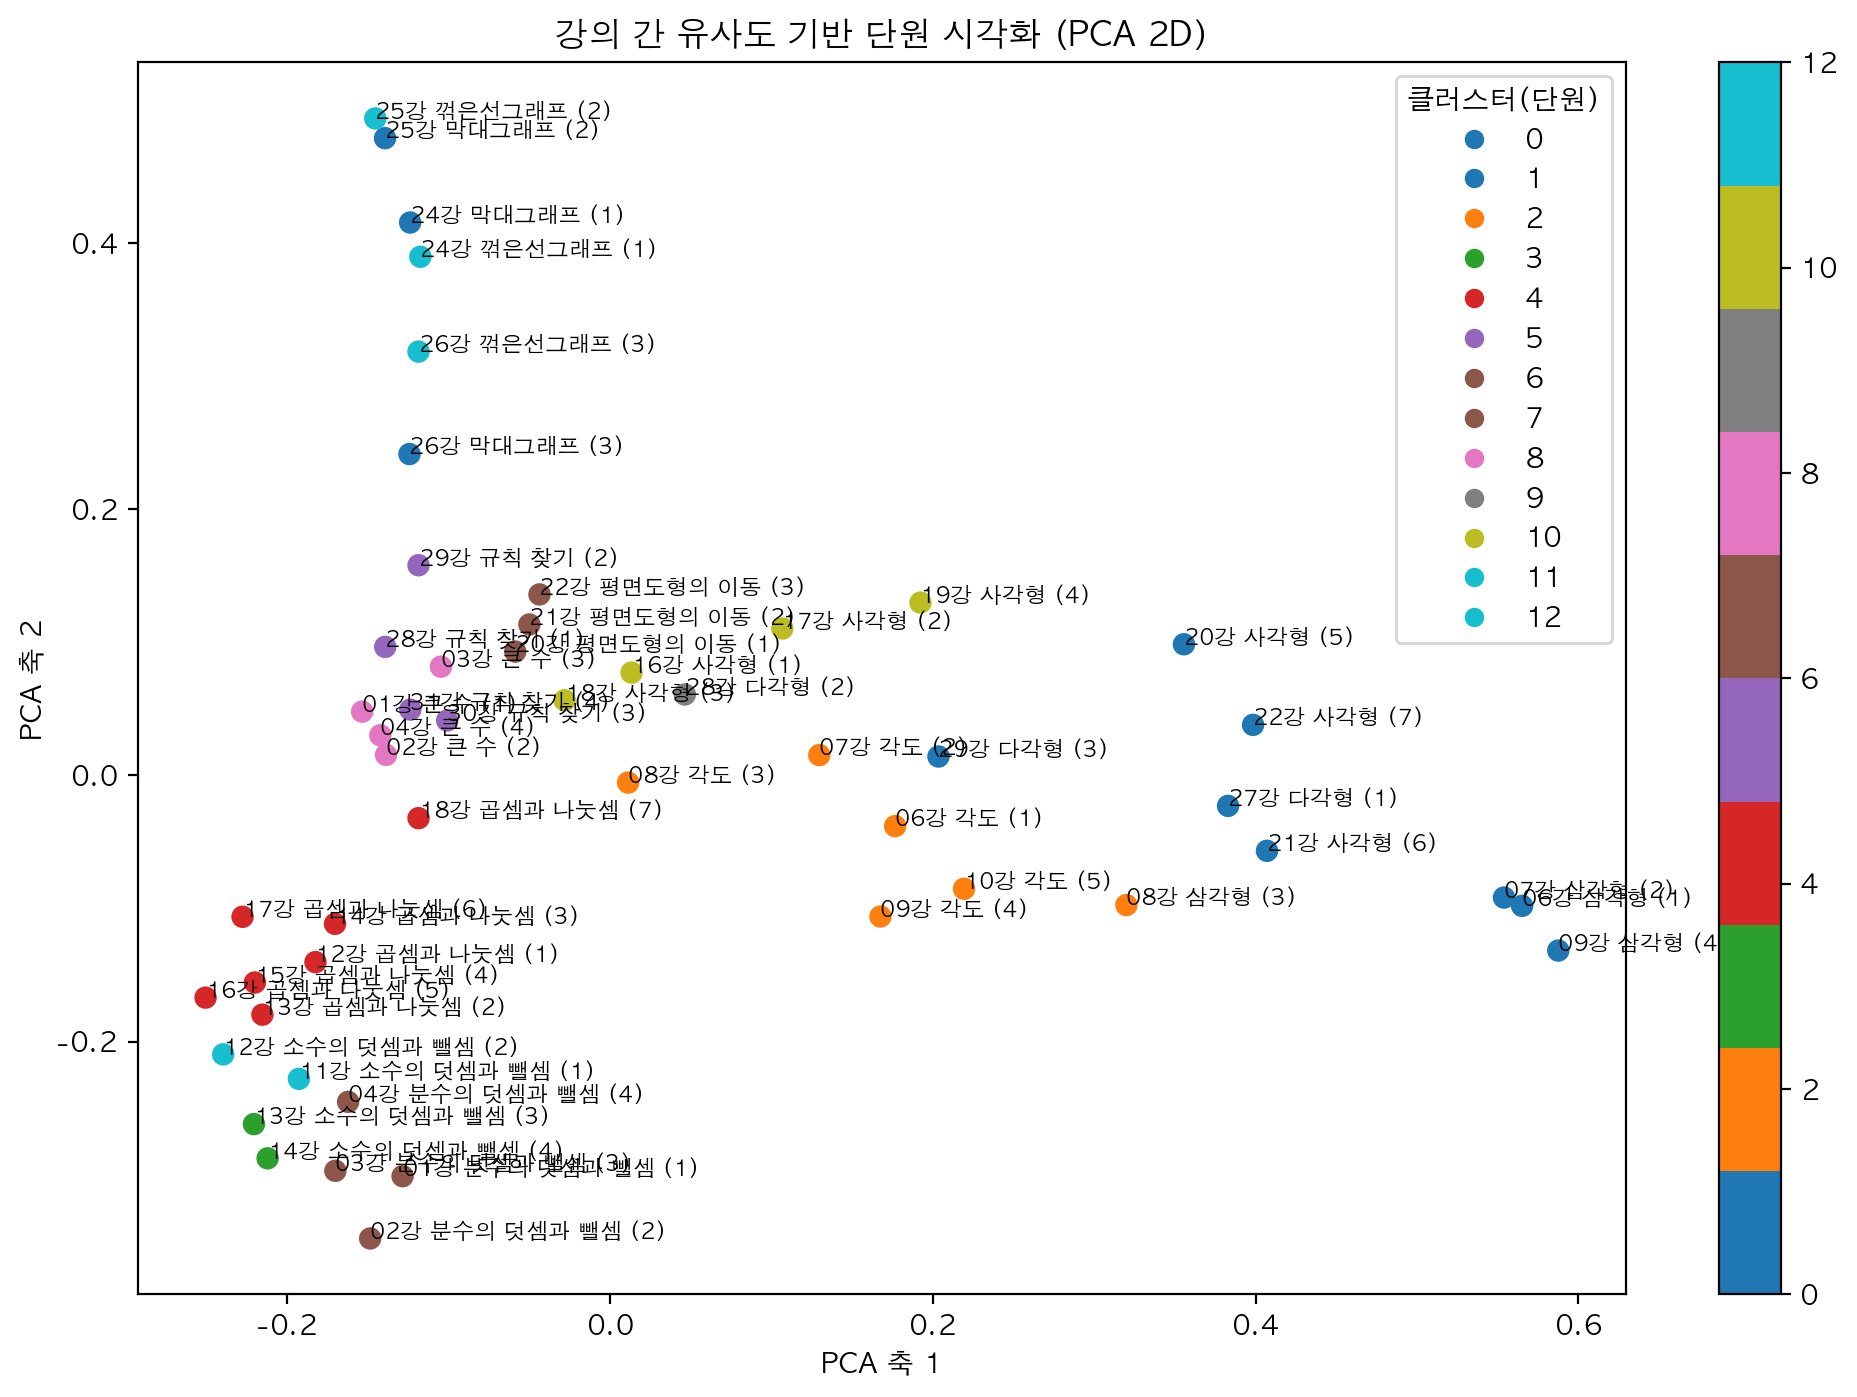

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 강의 텍스트 데이터를 결합
data['combined_text'] = data['강의 제목'] + ' ' + data['강의 내용'] + ' ' + data['요약'].apply(lambda x: ' '.join(eval(x)))

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['combined_text'])

# PCA로 차원 축소 (2차원)
pca = PCA(n_components=2)
pca_results = pca.fit_transform(tfidf_matrix.toarray())

# 결과를 DataFrame에 저장
data['pca_2d_one'] = pca_results[:, 0]
data['pca_2d_two'] = pca_results[:, 1]

# 시각화
plt.figure(figsize=(12, 8))

# 각 클러스터에 다른 색으로 시각화
scatter = plt.scatter(data['pca_2d_one'], data['pca_2d_two'], c=data['cluster'], cmap='tab10', s=50)

# 클러스터 레이블을 범례로 표시
plt.legend(*scatter.legend_elements(), title="클러스터(단원)")

plt.title("강의 간 유사도 기반 단원 시각화 (PCA 2D)")
plt.xlabel("PCA 축 1")
plt.ylabel("PCA 축 2")

# 각 점에 강의 제목을 표시
for i, title in enumerate(data['강의 제목']):
    plt.text(data['pca_2d_one'][i], data['pca_2d_two'][i], title, fontsize=8)

plt.colorbar()
plt.show()


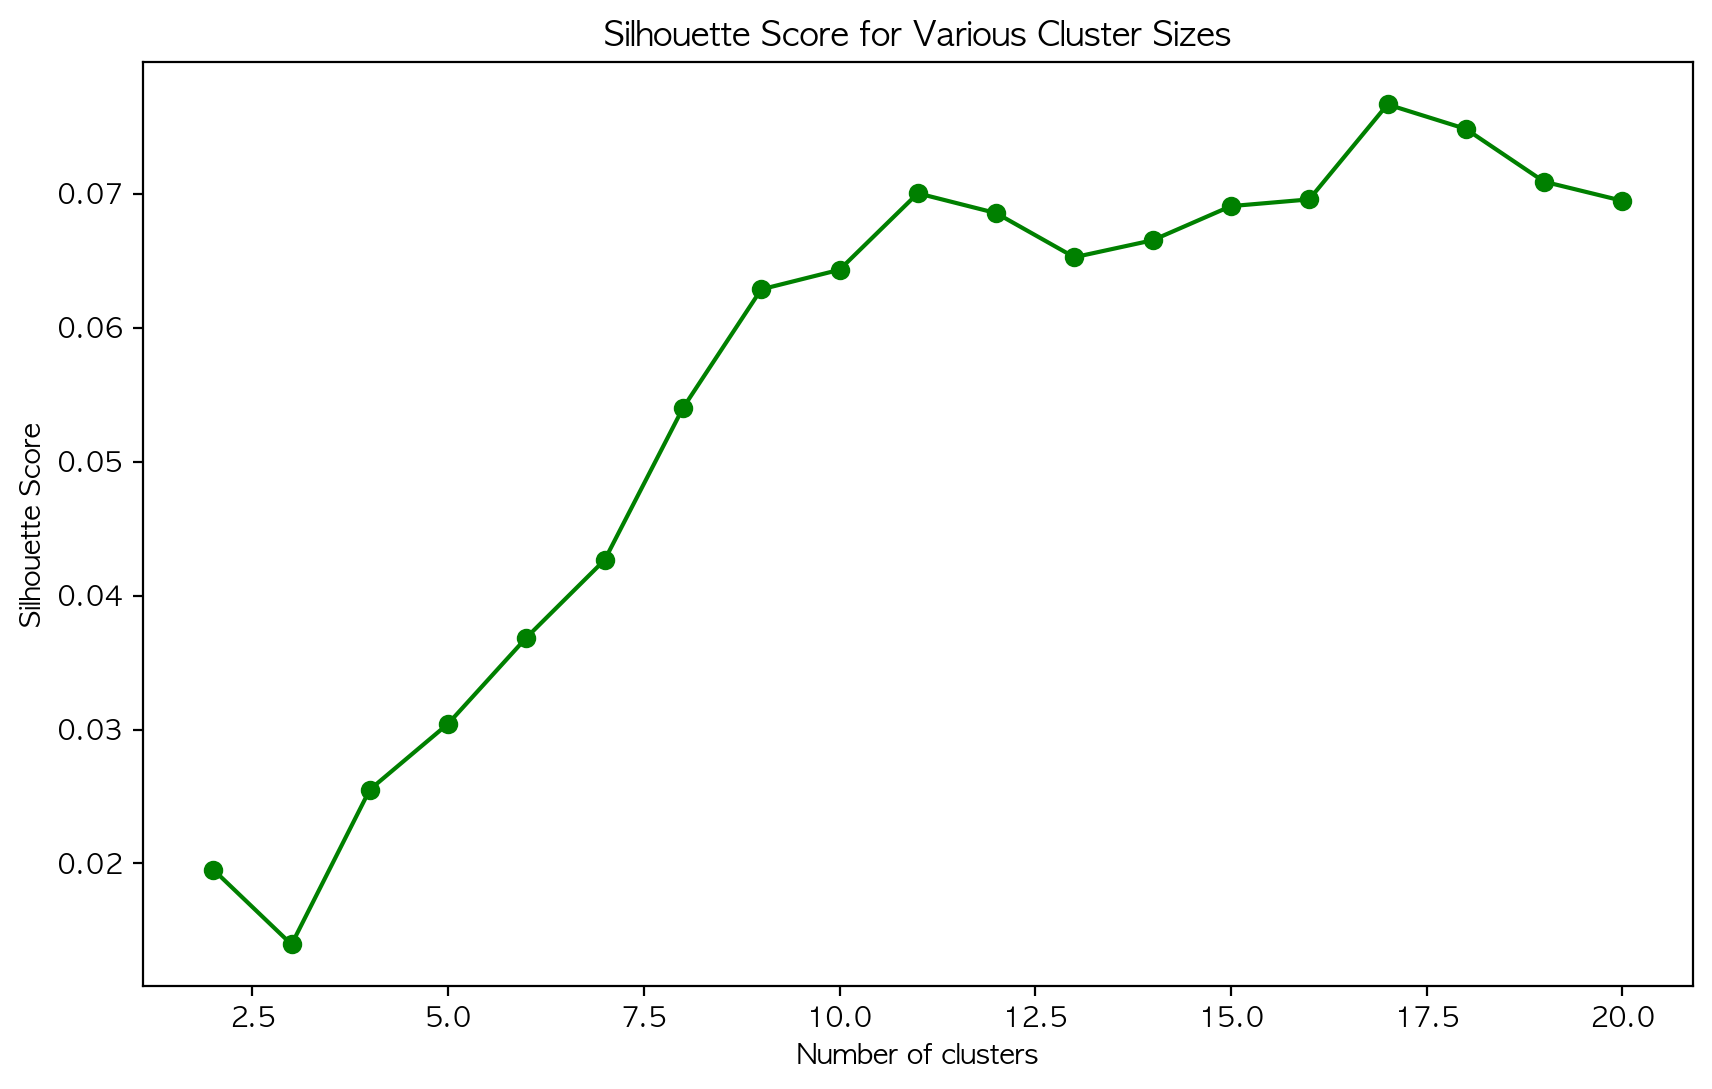

In [12]:
from sklearn.metrics import silhouette_score

# 클러스터 수에 따른 Silhouette Score 계산
silhouette_scores = []
for i in range(2, 21):  # 클러스터 개수를 2~20까지 변화시키면서 Silhouette Score 확인
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(tfidf_matrix)
    score = silhouette_score(tfidf_matrix, kmeans.labels_)
    silhouette_scores.append(score)

# Silhouette Score를 시각화하여 최적의 클러스터 수를 확인
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), silhouette_scores, marker='o', linestyle='-', color='g')
plt.title('Silhouette Score for Various Cluster Sizes')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()
